In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
commodities_monthly = pd.read_csv('variables_of_interest/commodities_monthly.csv')
commodities_monthly.drop(columns=['Unnamed: 0'])

,Year,Month,Coffee,Corn,Sugar
0,1990,1,75.829987,105.900513,14.200001
1,1990,2,84.010010,106.294167,14.650002
2,1990,3,93.959991,109.837318,15.310001
3,1990,4,93.730011,118.498337,15.240002
4,1990,5,92.019989,121.254097,14.619999
...,...,...,...,...,...
404,2023,9,183.589048,223.847666,26.563810
405,2023,10,183.951364,221.902519,26.903636
406,2023,11,197.433182,209.040297,27.309545
407,2023,12,210.310476,207.397969,22.145714


In [5]:
temp_etf = pd.read_csv('etf_vs/data/etf_normalized_vs_meat_monthly.csv')
#indexed_etf = pd.read_csv('variables_of_interest/index_etf_monthly.csv')
avg_etf = pd.read_csv('variables_of_interest/averaged_etf_monthly.csv')
temp_etf = temp_etf.drop(columns=['Unnamed: 0', 'Investment_Funds_ETF'])

FileNotFoundError: [Errno 2] No such file or directory: 'variables_of_interest/averaged_etf_monthly.csv'

In [24]:
merged_etfs = pd.merge(temp_etf, commodities_monthly, on=['Year','Month'], how='inner')
merged_etfs

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF,Unnamed: 0,Coffee,Corn,Sugar
0,2001,1,2188.50,2622.2,18.50,42.7,1682.50,403.4,17.50,33.760939,38.209637,33.100672,12.277433,132,65.652609,94.297233,10.059524
1,2001,2,1866.50,2322.2,17.00,39.7,1476.50,461.2,15.50,32.894615,39.825062,34.349403,14.138910,133,67.275500,92.377515,9.362500
2,2001,3,2080.50,2588.6,23.00,44.4,1616.00,409.3,16.00,32.713920,39.575668,32.910808,14.203782,134,66.665909,91.012154,8.716818
3,2001,4,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00,32.404285,38.372724,32.308881,14.097942,135,65.997619,87.545067,8.052105
4,2001,5,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50,35.201656,38.608391,29.177770,15.600822,136,69.631304,85.077523,8.959545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15,278.897895,344.993909,1164.050862,219.832935,403,186.346957,207.675889,24.193043
272,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55,271.175546,329.066365,1176.277724,211.588589,404,183.589048,223.847666,26.563810
273,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10,253.592562,316.868611,1142.686074,198.630677,405,183.951364,221.902519,26.903636
274,2023,11,2264.10,3817.3,10.65,44.5,2382.80,500.3,4.20,249.251962,342.498279,1314.577751,199.673985,406,197.433182,209.040297,27.309545


In [171]:
#indexed_etf = indexed_etf.drop(columns=['Unnamed: 0'])
avg_etf = avg_etf.drop(columns=['Unnamed: 0'])

avg_etf

,Year,Month,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,1999,11,26.123143,32.037020,123.532964,30.897771,17.868213
1,1999,12,25.250058,29.910405,127.775099,28.549048,14.447012
2,2000,1,27.021434,28.793713,127.600368,27.169199,15.766343
3,2000,2,23.642883,25.880471,120.976988,25.973383,16.672860
4,2000,3,22.384303,24.475699,124.859277,27.144133,18.823416
...,...,...,...,...,...,...,...
287,2023,10,190.832407,139.739063,299.958132,361.241720,198.630677
288,2023,11,188.111367,147.106855,313.372833,405.460350,199.673985
289,2023,12,201.555551,164.913676,331.248612,431.683387,214.157736
290,2024,1,208.025103,167.780693,338.555578,436.769991,224.549750


In [25]:
merged_etfs = merged_etfs.drop(columns=['Unnamed: 0'])

In [174]:
merged_etfs

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF,Coffee,Corn,Sugar
0,2001,1,2188.50,2622.2,18.50,42.7,1682.50,403.4,17.50,33.760939,38.209637,33.100672,12.277433,65.652609,94.297233,10.059524
1,2001,2,1866.50,2322.2,17.00,39.7,1476.50,461.2,15.50,32.894615,39.825062,34.349403,14.138910,67.275500,92.377515,9.362500
2,2001,3,2080.50,2588.6,23.00,44.4,1616.00,409.3,16.00,32.713920,39.575668,32.910808,14.203782,66.665909,91.012154,8.716818
3,2001,4,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00,32.404285,38.372724,32.308881,14.097942,65.997619,87.545067,8.052105
4,2001,5,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50,35.201656,38.608391,29.177770,15.600822,69.631304,85.077523,8.959545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15,278.897895,344.993909,1164.050862,219.832935,186.346957,207.675889,24.193043
272,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55,271.175546,329.066365,1176.277724,211.588589,183.589048,223.847666,26.563810
273,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10,253.592562,316.868611,1142.686074,198.630677,183.951364,221.902519,26.903636
274,2023,11,2264.10,3817.3,10.65,44.5,2382.80,500.3,4.20,249.251962,342.498279,1314.577751,199.673985,197.433182,209.040297,27.309545


In [172]:
merged_avg_etfs = pd.merge(avg_etf, commodities_monthly, on=['Year','Month'], how='inner')
merged_avg_etfs_temp = merged_avg_etfs.copy()
merged_avg_etfs_temp = merged_avg_etfs_temp.drop(columns=['Unnamed: 0'])
merged_avg_etfs_temp

,Year,Month,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF,Coffee,Corn,Sugar
0,1999,11,26.123143,32.037020,123.532964,30.897771,17.868213,112.450909,85.409341,6.505000
1,1999,12,25.250058,29.910405,127.775099,28.549048,14.447012,123.165217,87.222838,5.982000
2,2000,1,27.021434,28.793713,127.600368,27.169199,15.766343,111.851429,92.953275,5.629500
3,2000,2,23.642883,25.880471,120.976988,25.973383,16.672860,104.041429,95.081619,5.351000
4,2000,3,22.384303,24.475699,124.859277,27.144133,18.823416,100.652609,95.169351,5.111200
...,...,...,...,...,...,...,...,...,...,...
286,2023,9,204.234141,147.709120,309.438922,377.625270,211.588589,183.589048,223.847666,26.563810
287,2023,10,190.832407,139.739063,299.958132,361.241720,198.630677,183.951364,221.902519,26.903636
288,2023,11,188.111367,147.106855,313.372833,405.460350,199.673985,197.433182,209.040297,27.309545
289,2023,12,201.555551,164.913676,331.248612,431.683387,214.157736,210.310476,207.397969,22.145714


In [89]:
meat_df = pd.read_csv('variables_of_interest/meat_monthly.csv')
meat_df = meat_df.drop(columns=['Unnamed: 0'])
meat_df

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal
0,2001,1,2188.50,2622.2,18.50,42.7,1682.50,403.4,17.50
1,2001,2,1866.50,2322.2,17.00,39.7,1476.50,461.2,15.50
2,2001,3,2080.50,2588.6,23.00,44.4,1616.00,409.3,16.00
3,2001,4,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00
4,2001,5,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50
...,...,...,...,...,...,...,...,...,...
271,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15
272,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55
273,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10
274,2023,11,2264.10,3817.3,10.65,44.5,2382.80,500.3,4.20


In [ ]:
#merged_index_etf_meat = pd.merge(merged_index_etfs_temp, meat_df, on=['Year','Month'], how='inner')
#final_df = merged_index_etf_meat.copy()
#final_df

In [27]:
merged_etfs.to_csv('etf_vs/data/etf_norm_vs_commodities_vs_meat_monthly.csv')

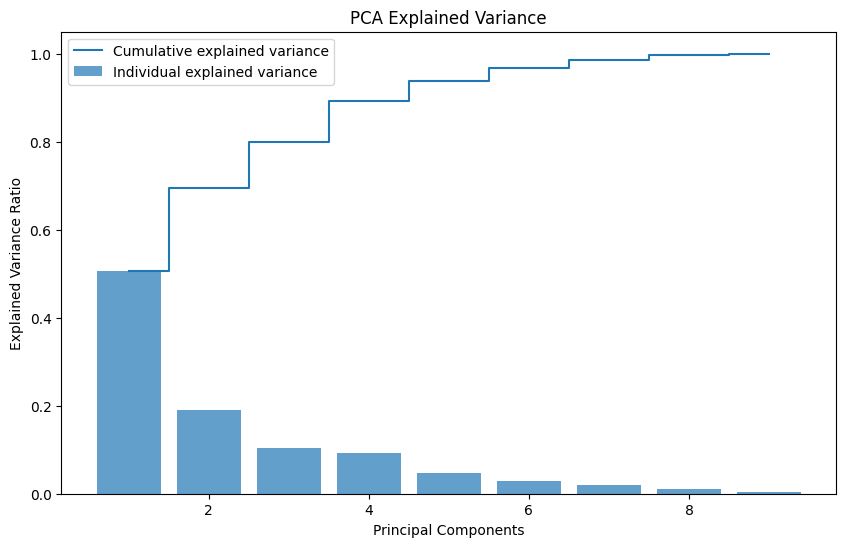

                      PC1       PC2       PC3       PC4       PC5       PC6  \
Beef             0.420836  0.731484  0.282754  0.255228 -0.292310 -0.232389   
Broilers         0.929286  0.234422  0.021820 -0.238014  0.030994  0.033900   
Lamb and Mutton -0.824803  0.378076 -0.073476  0.100847 -0.153744  0.344820   
Other Chicken    0.475450  0.722369  0.143331  0.178586  0.419299  0.143534   
Pork             0.835948  0.065016  0.092253 -0.342804 -0.327997  0.213786   
Turkey          -0.045154 -0.494152  0.841332  0.195943  0.021118  0.094737   
Veal            -0.892587  0.236902 -0.050602  0.295481 -0.126260 -0.008526   
Coffee           0.774174 -0.309676 -0.277424  0.362957  0.022009  0.050116   
Corn             0.722746 -0.252863 -0.190304  0.539896 -0.119747  0.085251   

                      PC7       PC8       PC9  
Beef             0.050050 -0.061305 -0.025706  
Broilers        -0.001428 -0.072001  0.143828  
Lamb and Mutton  0.045895 -0.142060  0.000062  
Other Chicken   -

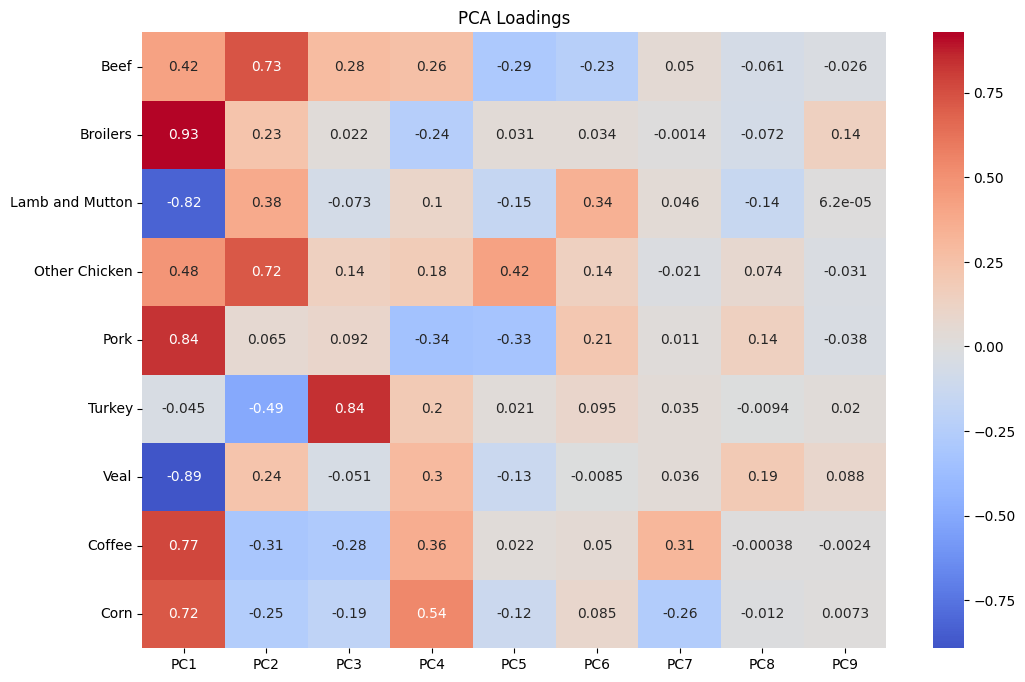

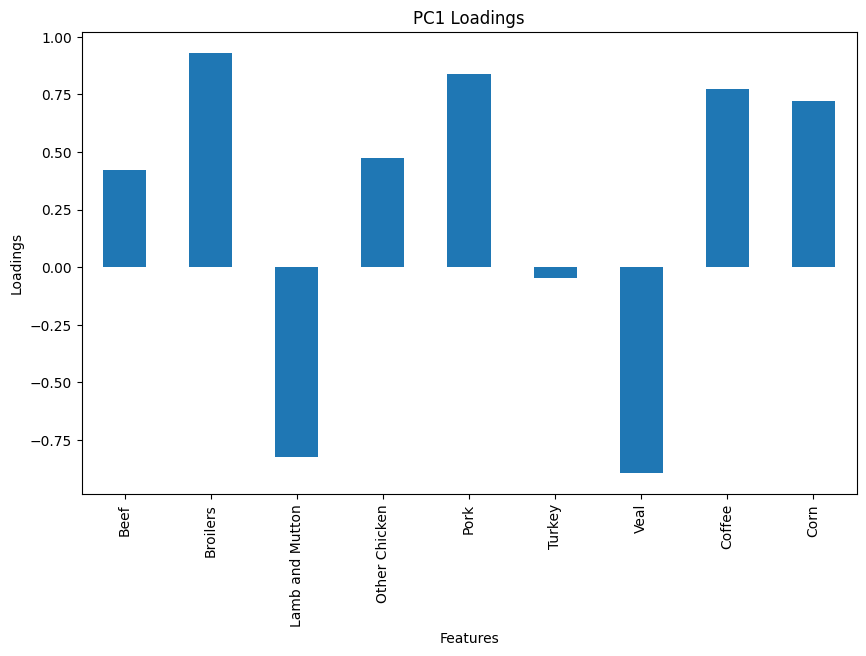

Model performance for Agri_Machinery_ETF:
Mean Squared Error (MSE): 322.5062508625767
Mean Absolute Error (MAE): 11.630434685391934
Root Mean Squared Error (RMSE): 17.95845903363027
R-squared (R²): 0.9013106406680174



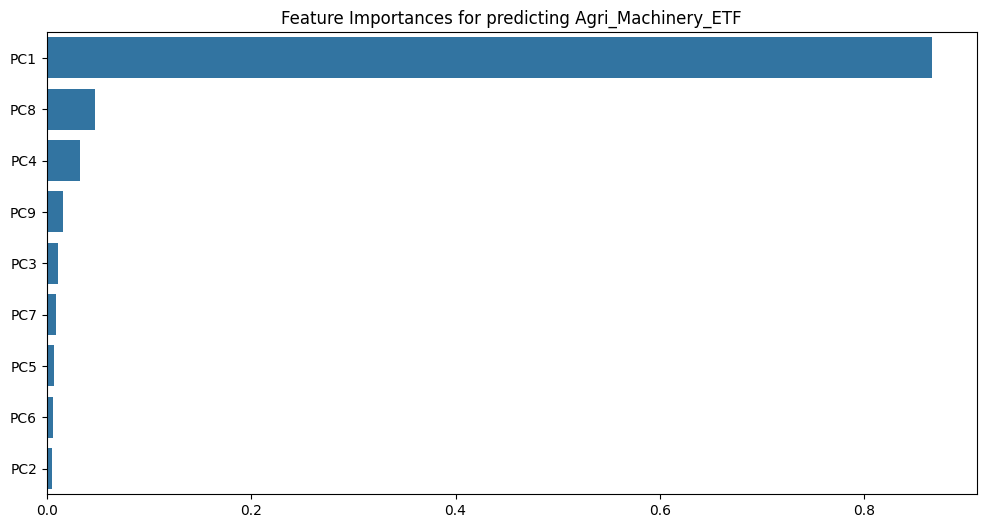

Model performance for Food_Beverage_ETF:
Mean Squared Error (MSE): 220.00832018342112
Mean Absolute Error (MAE): 8.514634635933705
Root Mean Squared Error (RMSE): 14.83267744486548
R-squared (R²): 0.9323431116819921



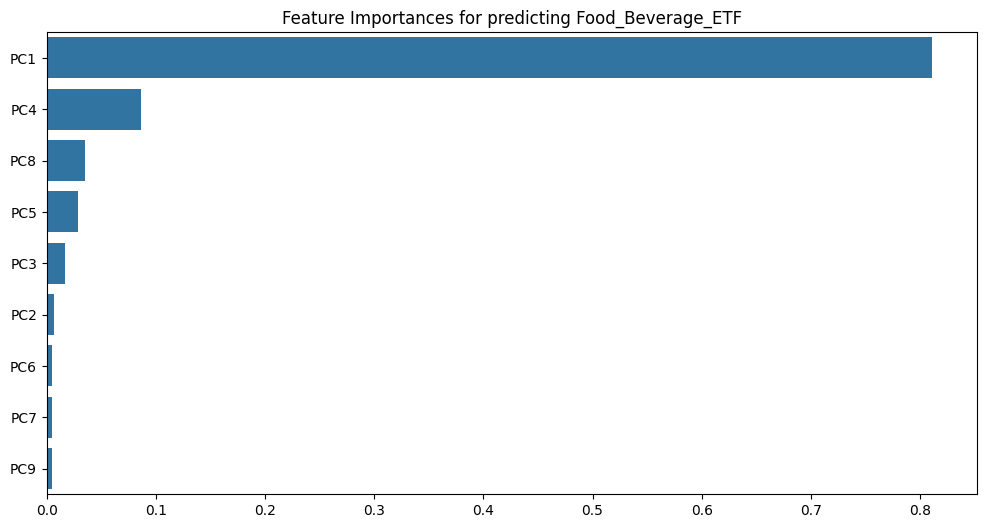

Model performance for Restaurant_FastFood_ETF:
Mean Squared Error (MSE): 6682.822196129026
Mean Absolute Error (MAE): 54.748273014201345
Root Mean Squared Error (RMSE): 81.74853023834144
R-squared (R²): 0.9004769482703828



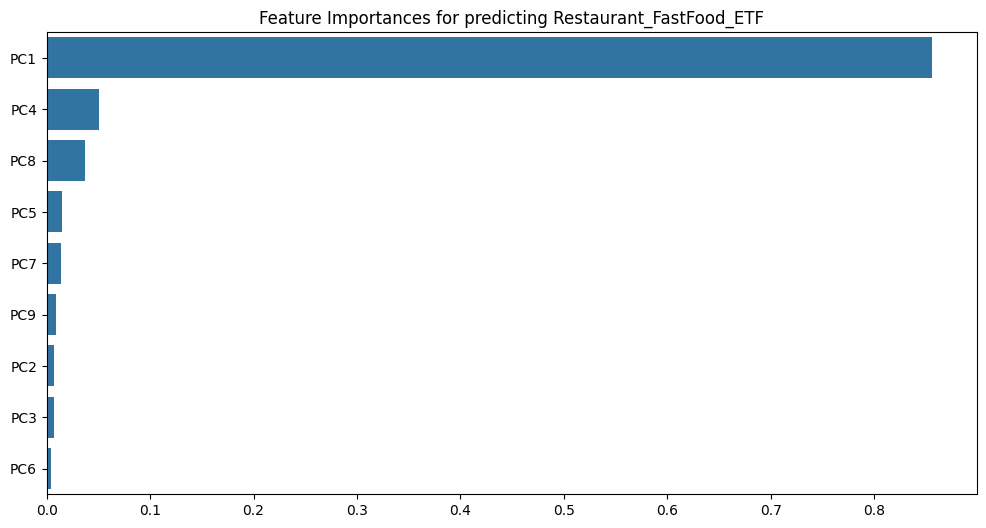

Model performance for Retail_ETF:
Mean Squared Error (MSE): 319.9612659583222
Mean Absolute Error (MAE): 12.325443658628805
Root Mean Squared Error (RMSE): 17.887461137856377
R-squared (R²): 0.8638593356842119



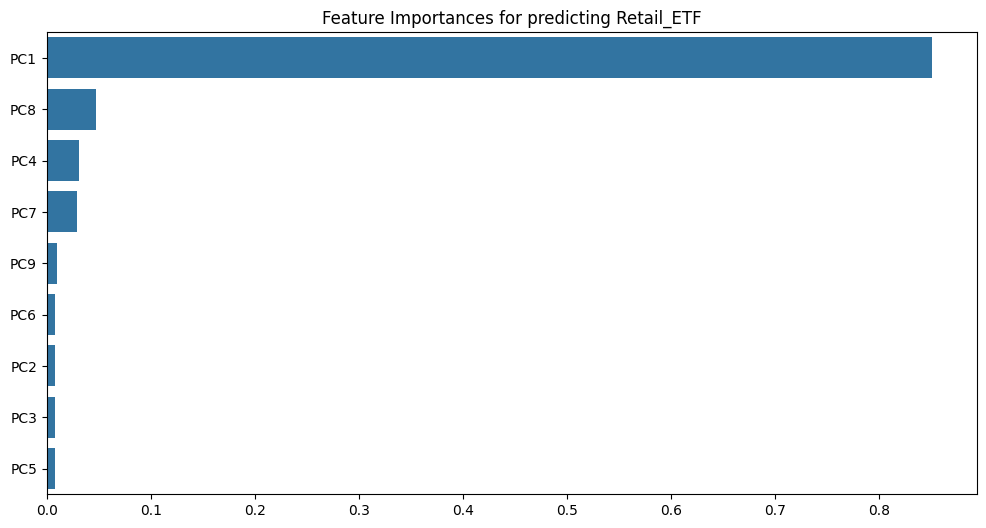

In [175]:
features = ['Beef', 'Broilers', 'Lamb and Mutton', 'Other Chicken', 'Pork', 'Turkey', 'Veal', 'Coffee', 'Corn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_etfs[features]) # merged_etfs

pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)


pca_columns = [f'PC{i+1}' for i in range(len(features))]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

#selected_pcs = ['PC1', 'PC8', 'PC4']
#X_selected_pcs = X_pca_df[selected_pcs]

def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, rmse, r2

def plot_feature_importances(target_column, X_pca_df, y):
    X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse, mae, rmse, r2 = evaluate_model(y_test, y_pred)
    print(f'Model performance for {target_column}:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')
    print()
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances[indices], y=[pca_columns[i] for i in indices])
    plt.title(f'Feature Importances for predicting {target_column}')
    plt.show()

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(features) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(features) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=features)
print(loadings_df)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings')
plt.show()

pc1_loadings = loadings_df['PC1']
plt.figure(figsize=(10, 6))
pc1_loadings.plot(kind='bar')
plt.title('PC1 Loadings')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.show()

etf_columns = ['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']
for etf in etf_columns:
    plot_feature_importances(etf, X_pca_df, merged_etfs[etf]) # merged_etfs[etf]

In [223]:
merged_etfs_xgb = merged_etfs.sort_values(by=['Year', 'Month']) #merged_etfs

merged_etfs_xgb

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF,Coffee,Corn,Sugar
0,2001,1,2188.50,2622.2,18.50,42.7,1682.50,403.4,17.50,33.760939,38.209637,33.100672,12.277433,65.652609,94.297233,10.059524
1,2001,2,1866.50,2322.2,17.00,39.7,1476.50,461.2,15.50,32.894615,39.825062,34.349403,14.138910,67.275500,92.377515,9.362500
2,2001,3,2080.50,2588.6,23.00,44.4,1616.00,409.3,16.00,32.713920,39.575668,32.910808,14.203782,66.665909,91.012154,8.716818
3,2001,4,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00,32.404285,38.372724,32.308881,14.097942,65.997619,87.545067,8.052105
4,2001,5,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50,35.201656,38.608391,29.177770,15.600822,69.631304,85.077523,8.959545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15,278.897895,344.993909,1164.050862,219.832935,186.346957,207.675889,24.193043
272,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55,271.175546,329.066365,1176.277724,211.588589,183.589048,223.847666,26.563810
273,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10,253.592562,316.868611,1142.686074,198.630677,183.951364,221.902519,26.903636
274,2023,11,2264.10,3817.3,10.65,44.5,2382.80,500.3,4.20,249.251962,342.498279,1314.577751,199.673985,197.433182,209.040297,27.309545


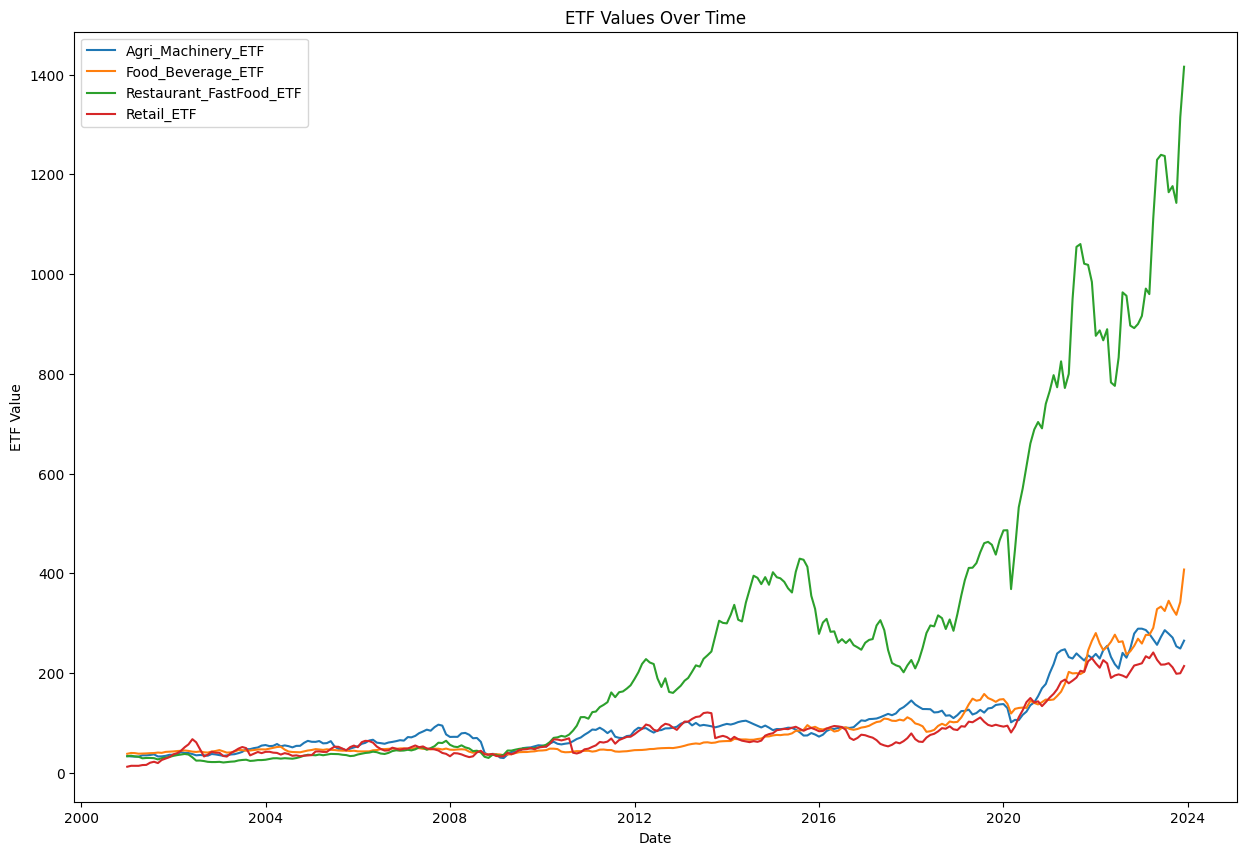

In [224]:
merged_etfs_xgb['Date'] = pd.to_datetime(merged_etfs_xgb[['Year', 'Month']].assign(DAY=1))

merged_etfs_xgb.set_index('Date', inplace=True)

etf_columns = ['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']

plt.figure(figsize=(15, 10))
for etf in etf_columns:
    plt.plot(merged_etfs_xgb.index, merged_etfs_xgb[etf], label=etf)

plt.legend()
plt.xlabel('Date')
plt.ylabel('ETF Value')
plt.title('ETF Values Over Time')
plt.show()

In [225]:
merged_etfs_xgb['Date'] = pd.to_datetime(merged_etfs_xgb[['Year', 'Month']].assign(DAY=1))
merged_etfs_xgb.set_index('Date', inplace=True)

Mean Squared Error (MSE): 15005.958731765171
Root Mean Squared Error (RMSE): 122.49881114429303
R-squared (R²): 0.822007974142007


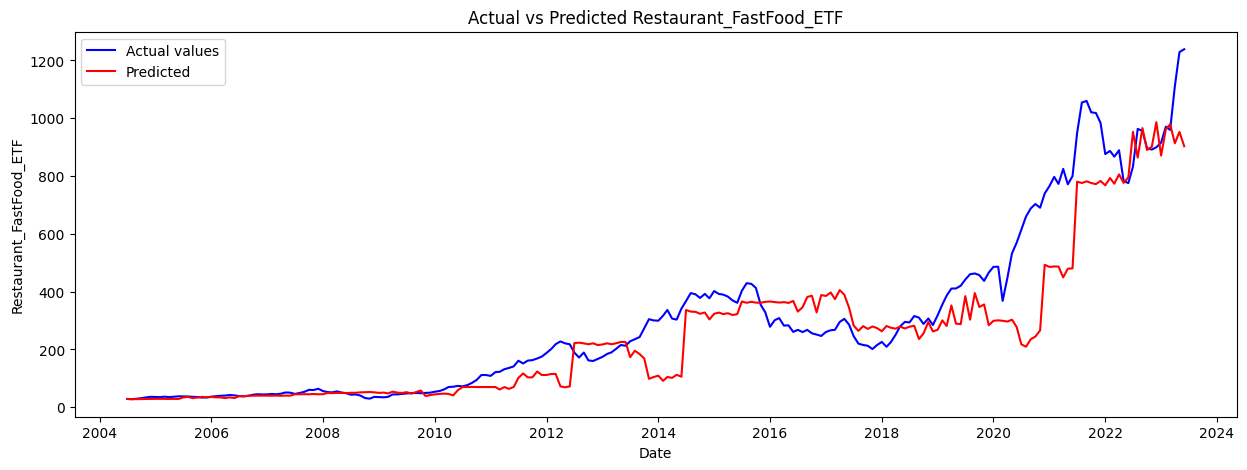

In [169]:
merged_etfs_xgb['Date'] = pd.to_datetime(merged_etfs_xgb[['Year', 'Month']].assign(DAY=1))

features = ['Beef', 'Broilers', 'Lamb and Mutton', 'Other Chicken', 'Pork', 'Turkey', 'Veal', 'Coffee', 'Corn']
target = 'Restaurant_FastFood_ETF'
merged_etfs_xgb[features + [target]] = merged_etfs_xgb[features + [target]].astype(float)

def add_lagged_features(df, features, lags=[1, 2, 3]):
    for lag in lags:
        for feature in features:
            df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
    return df

lags = [1, 2, 3]
merged_etfs_lstm = add_lagged_features(merged_etfs_xgb, features, lags)

merged_etfs_lstm.dropna(inplace=True)

lagged_features = [f'{feature}_lag{lag}' for feature in features for lag in lags]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_etfs_lstm[lagged_features + [target]])

scaled_df = pd.DataFrame(scaled_data, columns=lagged_features + [target])
scaled_df['Date'] = merged_etfs_lstm['Date'].values

def walk_forward_validation(data, n_train, n_test):
    predictions = []
    actuals = []
    dates = []

    for i in range(n_train, len(data) - n_test, n_test):
        train, test = data[i - n_train:i], data[i:i + n_test]
        
        X_train, y_train = train[lagged_features].values, train[target].values
        X_test, y_test = test[lagged_features].values, test[target].values

        model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), len(lagged_features))), y_test.reshape(-1, 1)), axis=1))[:, -1]
        y_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), len(lagged_features))), y_pred.reshape(-1, 1)), axis=1))[:, -1]

        predictions.extend(y_pred_inv)
        actuals.extend(y_test_inv)
        dates.extend(test['Date'].values)

    return np.array(predictions), np.array(actuals), np.array(dates)

n_train = 36  
n_test = 12  

predictions, actuals, dates = walk_forward_validation(scaled_df, n_train, n_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(15, 5))
plt.plot(dates, actuals, color='blue', label='Actual values')
plt.plot(dates, predictions, color='red', label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target)
plt.title(f'Actual vs Predicted {target}')
plt.show()


Mean Squared Error (MSE): 854.346651941165
Root Mean Squared Error (RMSE): 29.229208883258625
R-squared (R²): 0.8103212157702766


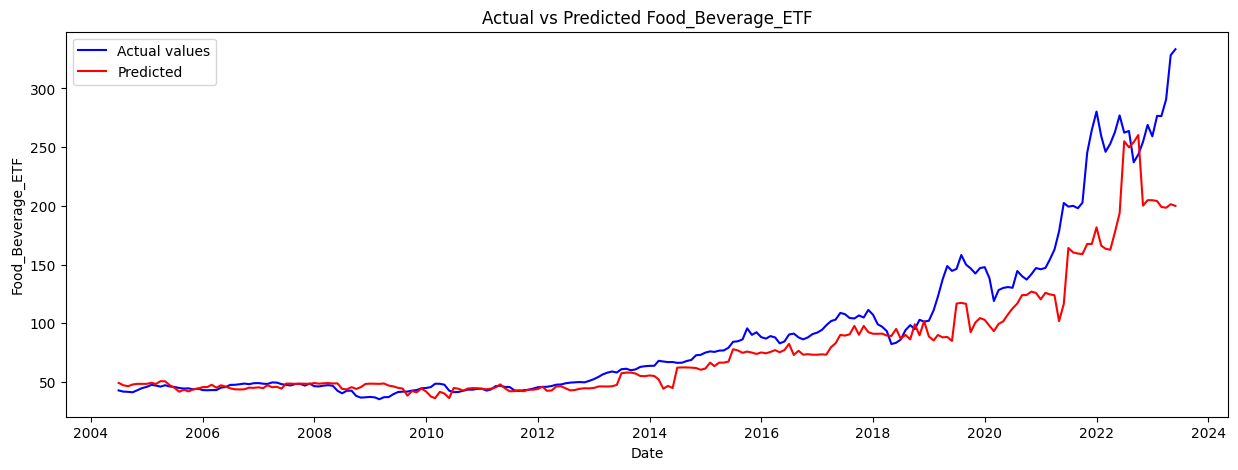

In [211]:
merged_etfs_xgb['Date'] = pd.to_datetime(merged_etfs_xgb[['Year', 'Month']].assign(DAY=1))

features = ['Beef', 'Broilers', 'Lamb and Mutton', 'Other Chicken', 'Pork', 'Turkey', 'Veal', 'Coffee', 'Corn']
target = 'Food_Beverage_ETF'
merged_etfs_xgb[features + [target]] = merged_etfs_xgb[features + [target]].astype(float)

def add_lagged_features(df, features, lags=[1, 2, 3]):
    for lag in lags:
        for feature in features:
            df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
    return df

lags = [1, 2, 3]
merged_etfs_lstm = add_lagged_features(merged_etfs_xgb, features, lags)

merged_etfs_lstm.dropna(inplace=True)

lagged_features = [f'{feature}_lag{lag}' for feature in features for lag in lags]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_etfs_lstm[lagged_features + [target]])

scaled_df = pd.DataFrame(scaled_data, columns=lagged_features + [target])
scaled_df['Date'] = merged_etfs_lstm['Date'].values

def walk_forward_validation(data, n_train, n_test):
    predictions = []
    actuals = []
    dates = []

    for i in range(n_train, len(data) - n_test, n_test):
        train, test = data[i - n_train:i], data[i:i + n_test]
        
        X_train, y_train = train[lagged_features].values, train[target].values
        X_test, y_test = test[lagged_features].values, test[target].values

        model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), len(lagged_features))), y_test.reshape(-1, 1)), axis=1))[:, -1]
        y_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), len(lagged_features))), y_pred.reshape(-1, 1)), axis=1))[:, -1]

        predictions.extend(y_pred_inv)
        actuals.extend(y_test_inv)
        dates.extend(test['Date'].values)

    return np.array(predictions), np.array(actuals), np.array(dates)

n_train = 36  
n_test = 12  

predictions, actuals, dates = walk_forward_validation(scaled_df, n_train, n_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(15, 5))
plt.plot(dates, actuals, color='blue', label='Actual values')
plt.plot(dates, predictions, color='red', label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target)
plt.title(f'Actual vs Predicted {target}')
plt.show()


Mean Squared Error (MSE): 785.6121463312322
Root Mean Squared Error (RMSE): 28.028773543115157
R-squared (R²): 0.7823875772479477


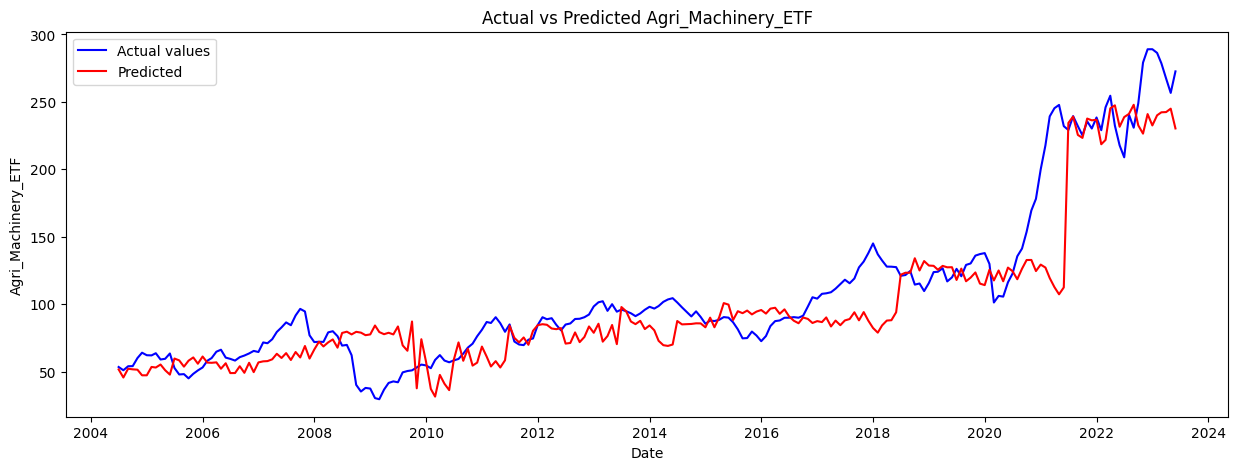

In [222]:

merged_etfs_xgb['Date'] = pd.to_datetime(merged_etfs_xgb[['Year', 'Month']].assign(DAY=1))

features = ['Beef', 'Broilers', 'Lamb and Mutton', 'Other Chicken', 'Pork', 'Turkey', 'Veal', 'Coffee', 'Corn']
target = 'Agri_Machinery_ETF'
merged_etfs_xgb[features + [target]] = merged_etfs_xgb[features + [target]].astype(float)

def add_lagged_features(df, features, lags=[1, 2, 3]):
    for lag in lags:
        for feature in features:
            df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
    return df

lags = [1, 2, 3]
merged_etfs_lstm = add_lagged_features(merged_etfs_xgb, features, lags)

merged_etfs_lstm.dropna(inplace=True)

lagged_features = [f'{feature}_lag{lag}' for feature in features for lag in lags]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_etfs_lstm[lagged_features + [target]])

scaled_df = pd.DataFrame(scaled_data, columns=lagged_features + [target])
scaled_df['Date'] = merged_etfs_lstm['Date'].values

def walk_forward_validation(data, n_train, n_test):
    predictions = []
    actuals = []
    dates = []

    for i in range(n_train, len(data) - n_test, n_test):
        train, test = data[i - n_train:i], data[i:i + n_test]
        
        X_train, y_train = train[lagged_features].values, train[target].values
        X_test, y_test = test[lagged_features].values, test[target].values

        model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), len(lagged_features))), y_test.reshape(-1, 1)), axis=1))[:, -1]
        y_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), len(lagged_features))), y_pred.reshape(-1, 1)), axis=1))[:, -1]

        predictions.extend(y_pred_inv)
        actuals.extend(y_test_inv)
        dates.extend(test['Date'].values)

    return np.array(predictions), np.array(actuals), np.array(dates)

n_train = 36  
n_test = 12  

predictions, actuals, dates = walk_forward_validation(scaled_df, n_train, n_test)


mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(15, 5))
plt.plot(dates, actuals, color='blue', label='Actual values')
plt.plot(dates, predictions, color='red', label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target)
plt.title(f'Actual vs Predicted {target}')
plt.show()


Mean Squared Error (MSE): 613.1069551656927
Root Mean Squared Error (RMSE): 24.760996651300058
R-squared (R²): 0.7723821954199328


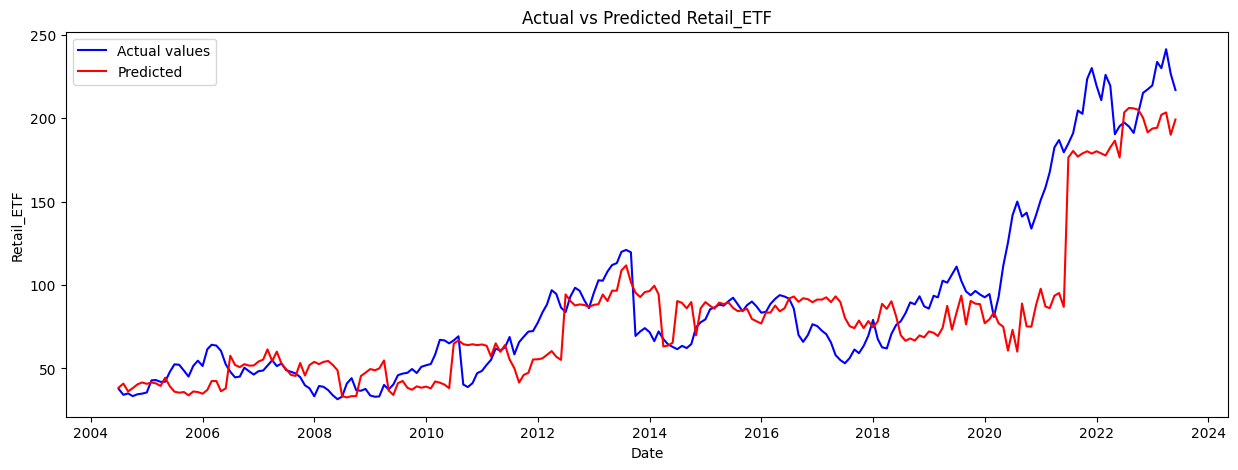

In [227]:

merged_etfs_xgb['Date'] = pd.to_datetime(merged_etfs_xgb[['Year', 'Month']].assign(DAY=1))

features = ['Beef', 'Broilers', 'Lamb and Mutton', 'Other Chicken', 'Pork', 'Turkey', 'Veal', 'Coffee', 'Corn']
target = 'Retail_ETF'
merged_etfs_xgb[features + [target]] = merged_etfs_xgb[features + [target]].astype(float)

def add_lagged_features(df, features, lags=[1, 2, 3]):
    for lag in lags:
        for feature in features:
            df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
    return df

lags = [1, 2, 3]
merged_etfs_lstm = add_lagged_features(merged_etfs_xgb, features, lags)

merged_etfs_lstm.dropna(inplace=True)

lagged_features = [f'{feature}_lag{lag}' for feature in features for lag in lags]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_etfs_lstm[lagged_features + [target]])

scaled_df = pd.DataFrame(scaled_data, columns=lagged_features + [target])
scaled_df['Date'] = merged_etfs_lstm['Date'].values

def walk_forward_validation(data, n_train, n_test):
    predictions = []
    actuals = []
    dates = []

    for i in range(n_train, len(data) - n_test, n_test):
        train, test = data[i - n_train:i], data[i:i + n_test]
        
        X_train, y_train = train[lagged_features].values, train[target].values
        X_test, y_test = test[lagged_features].values, test[target].values

        model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), len(lagged_features))), y_test.reshape(-1, 1)), axis=1))[:, -1]
        y_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), len(lagged_features))), y_pred.reshape(-1, 1)), axis=1))[:, -1]

        predictions.extend(y_pred_inv)
        actuals.extend(y_test_inv)
        dates.extend(test['Date'].values)

    return np.array(predictions), np.array(actuals), np.array(dates)

n_train = 36  
n_test = 12  

predictions, actuals, dates = walk_forward_validation(scaled_df, n_train, n_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(15, 5))
plt.plot(dates, actuals, color='blue', label='Actual values')
plt.plot(dates, predictions, color='red', label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target)
plt.title(f'Actual vs Predicted {target}')
plt.show()
